In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import sys
import os

# Set working directory to your project folder
project_path = '/content/drive/MyDrive/Github/Content Recommender_MVP'
os.chdir(project_path)

# Add 'app' folder to system path so imports like 'from app.utils import ...' work
sys.path.append(os.path.join(project_path, 'src'))

# Confirm working directory
print("Working directory set to:", os.getcwd())


Working directory set to: /content/drive/MyDrive/Github/Content Recommender_MVP


In [5]:
#Purpose: Explore distributions, sample entries, content lengths, category frequency.
# notebooks/EDA.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import load_clean_data

# Load cleaned data
df = load_clean_data()


/content/drive/MyDrive/Github/Content Recommender_MVP/src/data_loader.py:22: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194300 entries, 0 to 194299
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          194300 non-null  object 
 1   title       194300 non-null  object 
 2   content     194300 non-null  object 
 3   category    194300 non-null  object 
 4   source      194300 non-null  object 
 5   popularity  550 non-null     float64
dtypes: float64(1), object(5)
memory usage: 8.9+ MB


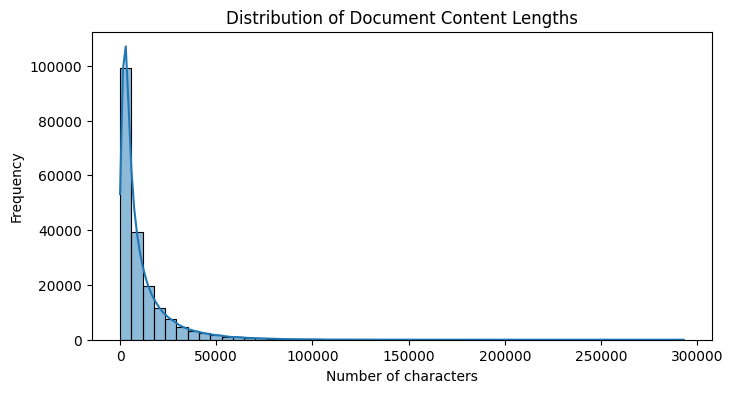

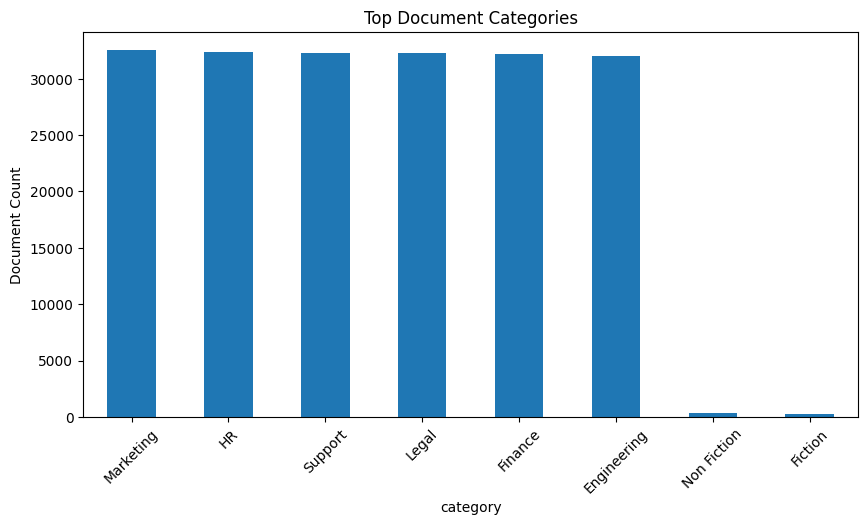

<Axes: title={'center': 'Source Breakdown'}, ylabel='count'>

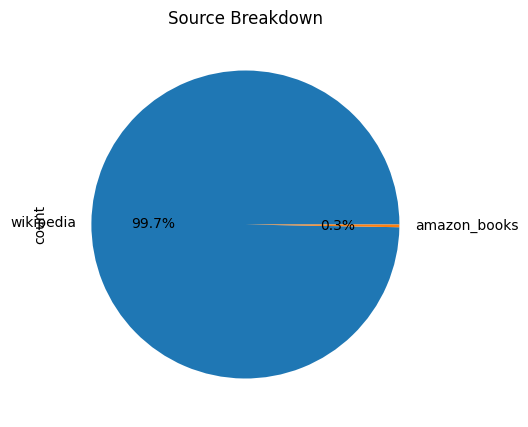

In [6]:
# Basic overview
df.head()
df.info()
df.describe()

# Text lengths
df["text_length"] = df["content"].str.len()
df["title_length"] = df["title"].str.len()

# Plot length distribution
plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Document Content Lengths")
plt.xlabel("Number of characters")
plt.ylabel("Frequency")
plt.show()

# Top categories
plt.figure(figsize=(10,5))
df["category"].value_counts().head(10).plot(kind='bar')
plt.title("Top Document Categories")
plt.ylabel("Document Count")
plt.xticks(rotation=45)
plt.show()

# Source breakdown
df["source"].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5), title="Source Breakdown")